In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pplt
from datetime import datetime
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib import pyplot
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Telecom_Clean.xlsx',index_col=0)
print(df.shape)
df.head()

(1439, 88)


,city,NB_Emp,Size_Comp,Sect_Comp,Opert_Princ,Opert_Period,Abonnement_Orange,Abonnement_Ooredoo,Abonnement_Telecom,Opert_Princ_Type_Offer,...,Size_CompMax,Orange,Ooredoo,TunisieTélécom,Info_Facility_Understand_numeric,Visit_Eval_numeric,Store_Staff_numeric,Request_Comprehension_numeric,Proposed_solution_in_Store_numeric,privileged welcome as a business customer_numeric
0,TUNIS,20,10-24,Industrie,Ooredoo,1 an à moins de 2 ans,Les abonnements mobiles sont fournis par l’en...,Les abonnements mobiles sont fournis par l’en...,999,Offre mobile prépayée,...,24,1,1,0,999,999,999,999,999,999
1,TUNIS,11,10-24,Services,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,999,999,Offre mobile postpayé,...,24,1,0,0,11,999,999,999,999,999
2,TUNIS,11,10-24,Services,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,999,999,Offre mobile prépayée,...,24,1,0,0,6,999,999,999,999,999
3,TUNIS,10,10-24,Industrie,Ooredoo,3 mois à moins de 6 mois,999,Les abonnements mobiles sont fournis par l’en...,999,Offre mobile prépayée,...,24,0,1,0,999,999,999,999,999,999
4,TUNIS,12,10-24,Santé (Healthcare),Tunisie Télécom,3 ans ou plus,Certains ou tous les employés ont leur propre...,999,Les abonnements mobiles sont fournis par l’en...,Offre mobile postpayé,...,24,1,0,1,4,999,999,999,999,9


<AxesSubplot:ylabel='None'>

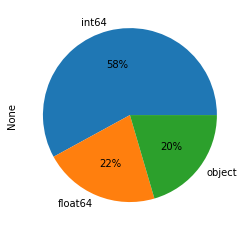

In [3]:
df.dtypes.value_counts().plot.pie(autopct='%1.0f%%')

<AxesSubplot:>

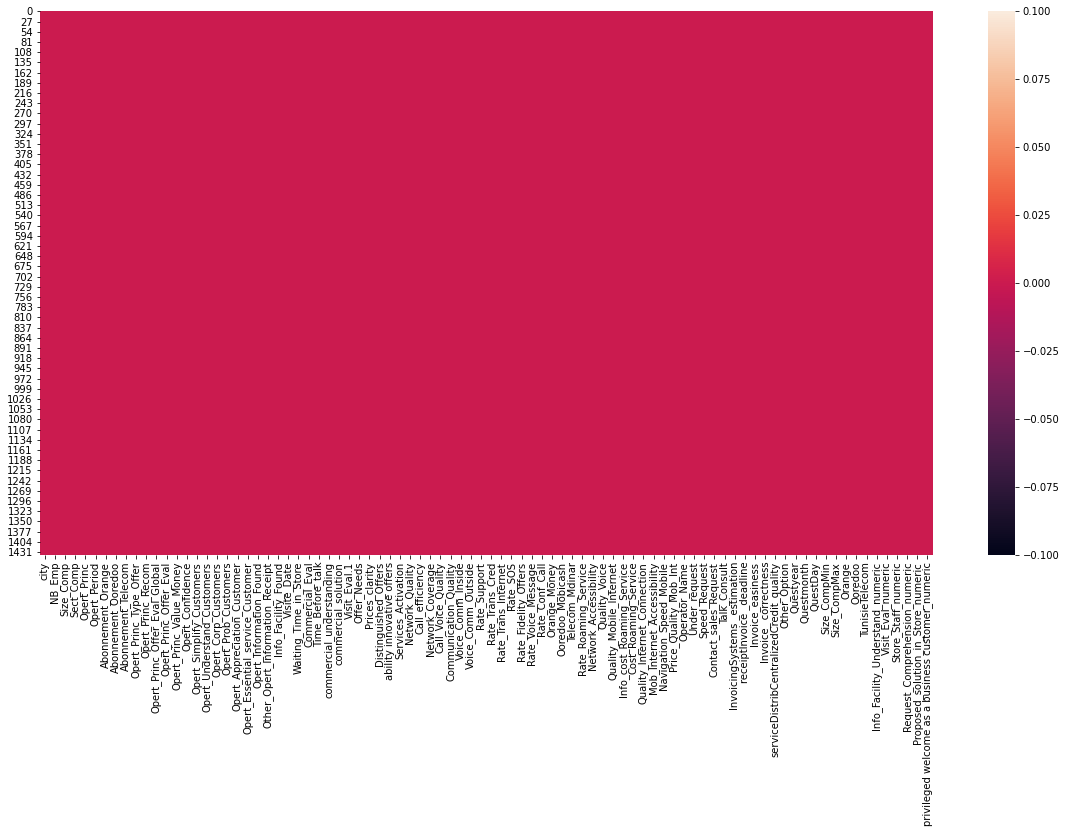

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

In [5]:
#Encodage 
data = pd.get_dummies(df, prefix_sep='_', drop_first=True)
print(data.shape)
data.head()

(1439, 303)


,NB_Emp,Opert_Princ_Recom,Opert_Princ_Offer_Eval_Global,Opert_Princ_Offer_Eval,Opert_Princ_Value_Money,Opert_Confidence,Opert_Simplify_Customers,Opert_Understand_Customers,Opert_Corp_Customers,Opert_Prob_Customers,...,"Other_Option_4.Sur Facebook, Twitter, etc","Other_Option_4.Sur Facebook, Twitter, etc 5.Via le bouche à oreille",Other_Option_5.Via le bouche à oreille 6.En boutique agence,Other_Option_5.Via le bouche à oreille 7.Chez votre distributeur,Other_Option_6.En boutique agence,Other_Option_8.En appelant le Service Client,"Other_Option_Sur Internet via un moteur de recherche (Google, Yahoo!, Bing, …) 4.Sur Facebook, Twitter, etc","Other_Option_Sur Internet via un moteur de recherche (Google, Yahoo!, Bing, …) 6.En boutique agence","Other_Option_Sur Internet via un moteur de recherche (Google, Yahoo!, Bing, …) 8.En appelant le Service Client",Other_Option_unknown
0,20,6.0,6,6,6.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,1
1,11,5.0,5,6,5.0,5.0,6.0,5.0,5.0,4.0,...,0,0,0,0,0,0,0,0,0,1
2,11,6.0,6,6,6.0,5.0,6.0,4.0,6.0,5.0,...,0,0,0,0,0,0,0,0,0,1
3,10,3.0,5,7,5.0,6.0,7.0,7.0,6.0,7.0,...,0,0,0,0,0,0,0,0,0,1
4,12,1.0,6,5,6.0,2.0,3.0,9.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,1


# K-Means

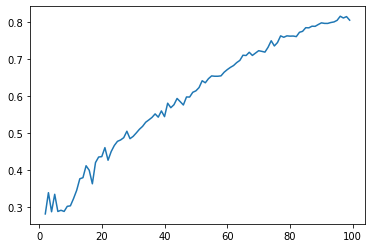

In [7]:
#Modelisation
from sklearn import cluster 
#evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

y_pred_km_tab = []
silhouette_km_tab = []

for i in range(2,100):
    #modelisation
    kmeans = cluster.KMeans(n_clusters=i);
    kmeans.fit(data);
#     print(kmeans.labels_)
    y_pred_km_tab.append(kmeans.labels_)
    #evaluation
    score = silhouette_score(data, kmeans.labels_, metric='euclidean')
    silhouette_km = score
#     print(i,'Silhouette Score: %.3f' % score)
    silhouette_km_tab.append(silhouette_km)

plt.plot(range(2,100),silhouette_km_tab)

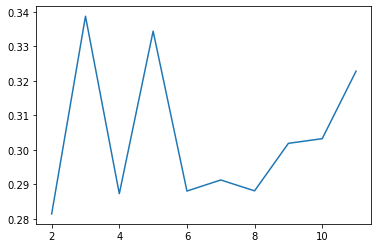

In [8]:
plt.plot(range(2,12),silhouette_km_tab[:10])

In [9]:
#modelisation
kmeans = cluster.KMeans(n_clusters=3);
kmeans.fit(data);
# print(kmeans.labels_)
#evaluation
score = silhouette_score(data, kmeans.labels_, metric='euclidean')
silhouette_km = score
# print('Silhouette Score: %.3f' % score)

In [10]:
#Centroides
kmeans.cluster_centers_

array([[ 2.02478992e+01,  6.50000000e+00,  6.54201681e+00,
         6.36134454e+00,  6.20471522e+00,  5.71008403e+00,
         5.79411765e+00,  6.59243697e+00,  5.78991597e+00,
         5.73444598e+00,  5.76050420e+00,  5.98739496e+00,
         2.60630252e+02,  1.89668067e+02,  1.30941176e+02,
         8.52310924e+01,  1.64558824e+02,  2.47508403e+02,
         5.23529412e+00,  5.47478992e+00,  5.24789916e+00,
         5.55882353e+00,  6.08403361e+00,  6.23949580e+00,
         3.46218487e+00,  6.39915966e+00,  6.52521008e+00,
         6.45378151e+00,  6.51260504e+00,  6.30672269e+00,
         3.64289916e+02,  7.31890756e+02,  8.52815126e+02,
         8.52819328e+02,  9.23781513e+02,  8.07025210e+02,
         9.40453782e+02,  6.27143343e+00,  6.14409176e+00,
         6.10829994e+00,  3.93882667e+02,  5.97698940e+00,
         5.29985807e+00,  6.51243181e+00,  6.33045128e+00,
         6.35278310e+00,  6.19215400e+00,  8.48781513e+02,
         8.15134454e+02,  8.64894958e+02,  8.81634454e+0

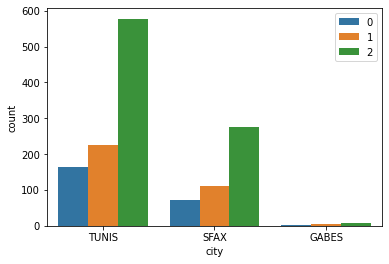

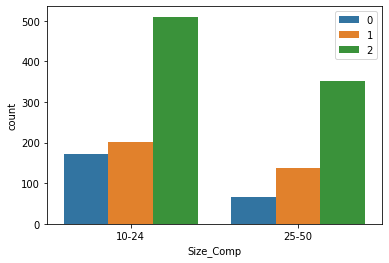

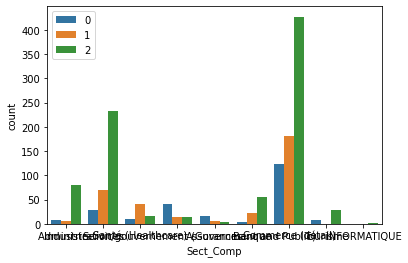

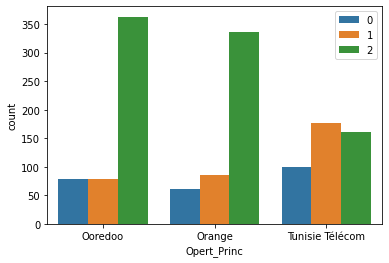

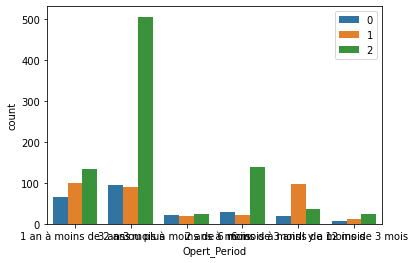

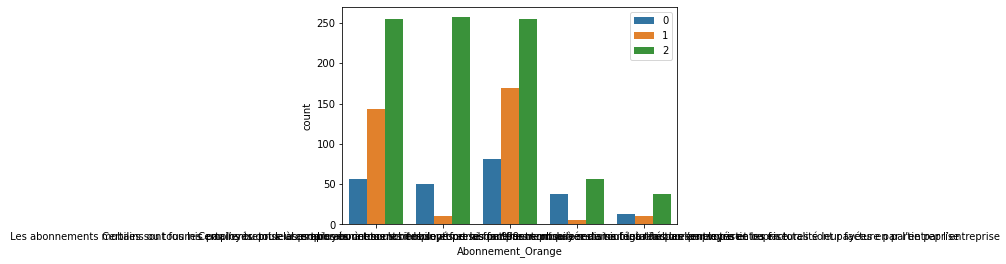

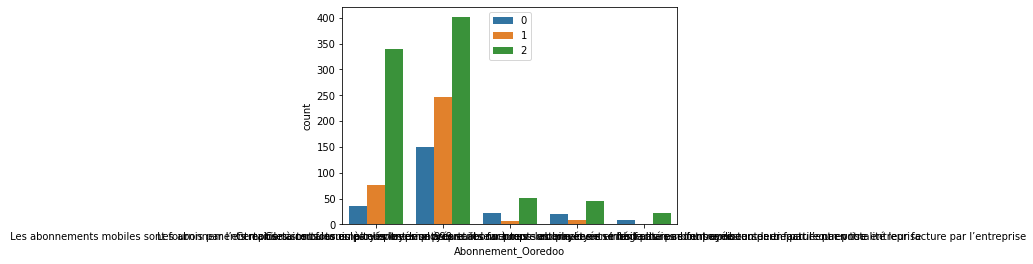

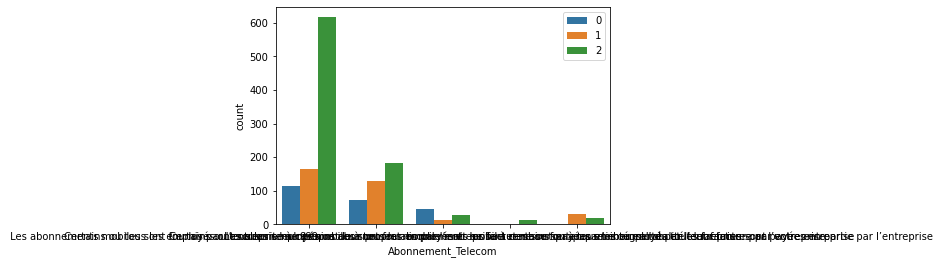

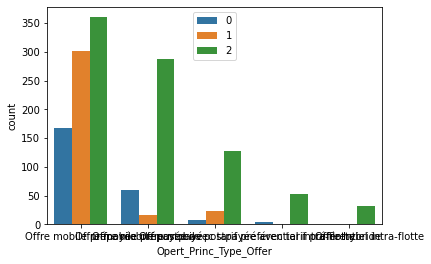

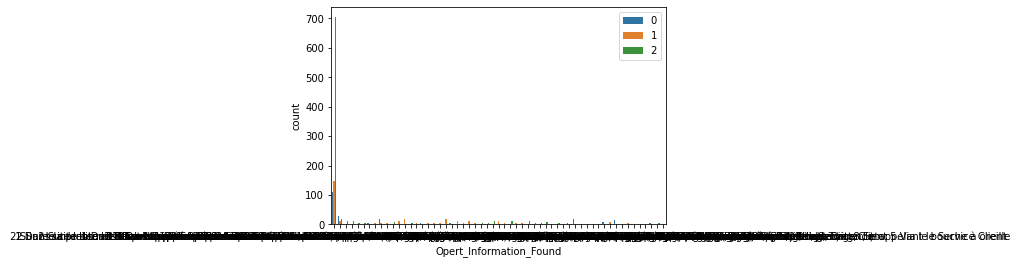

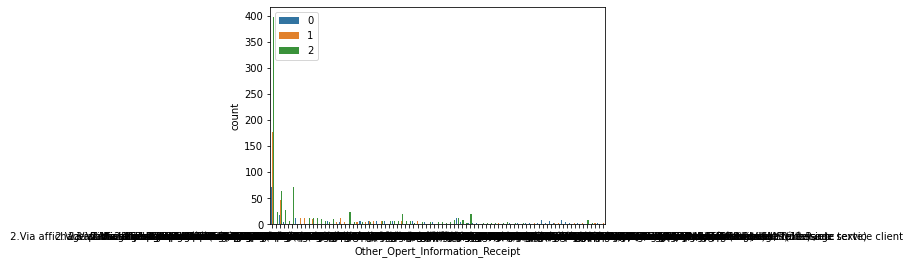

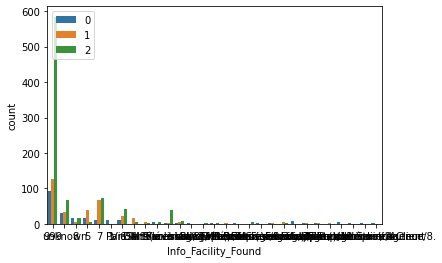

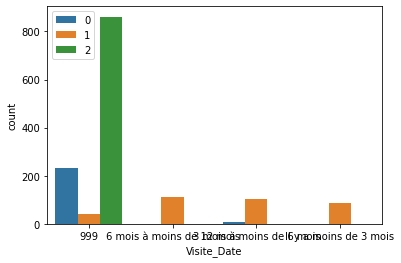

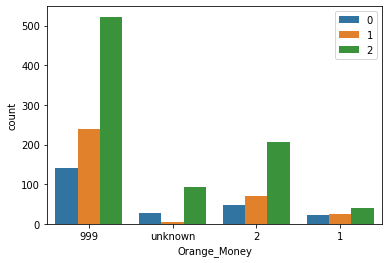

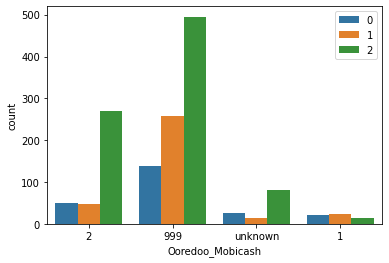

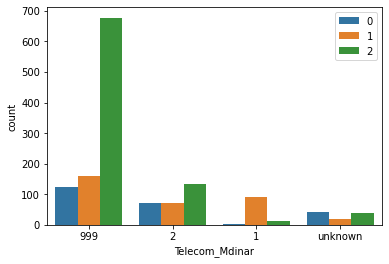

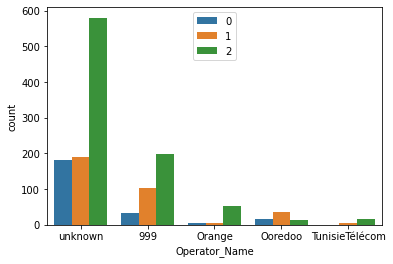

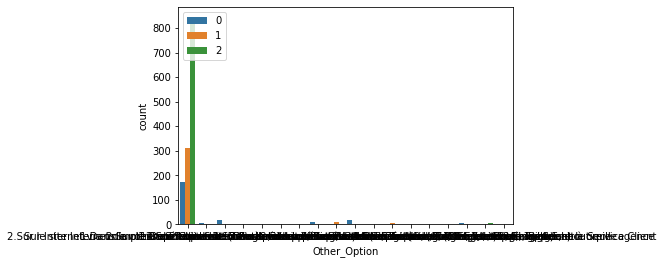

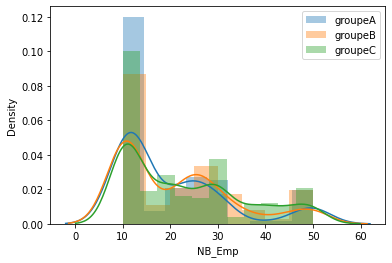

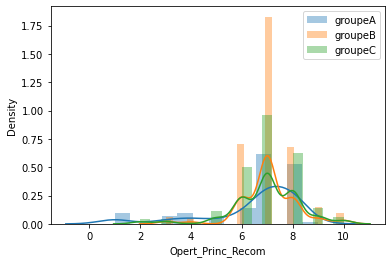

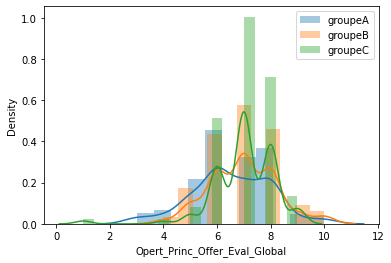

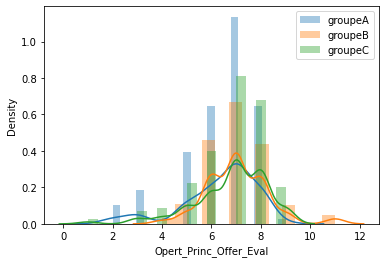

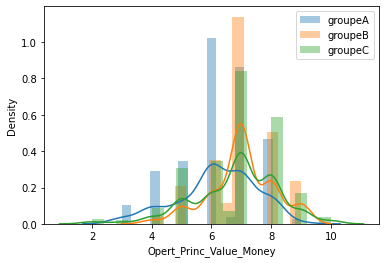

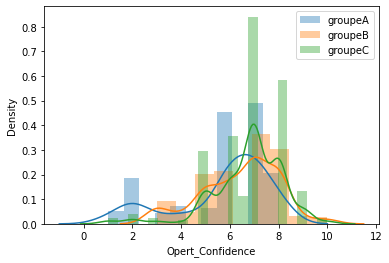

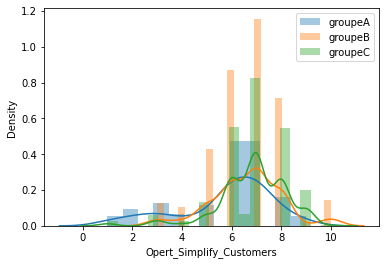

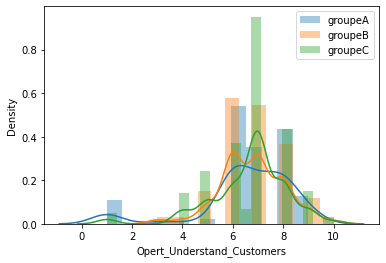

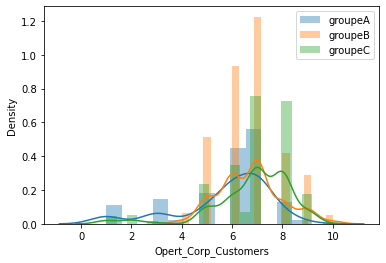

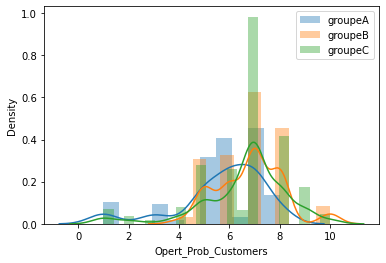

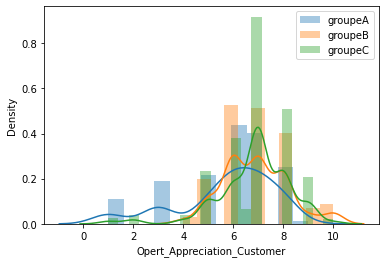

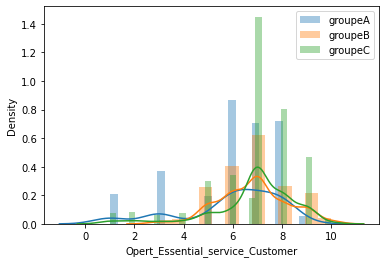

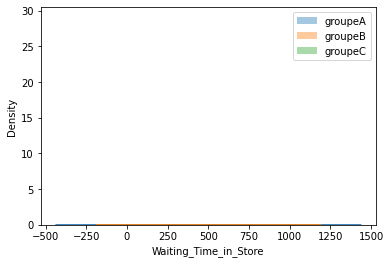

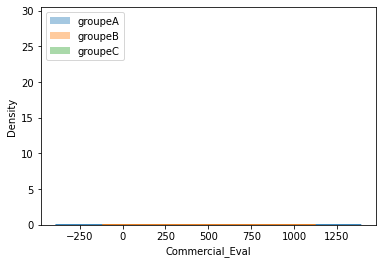

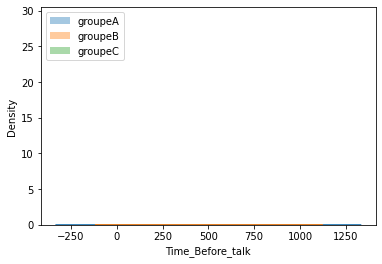

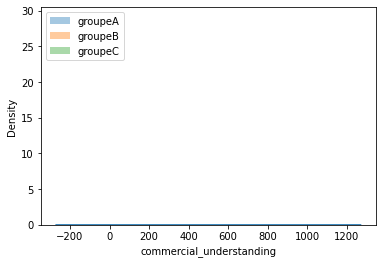

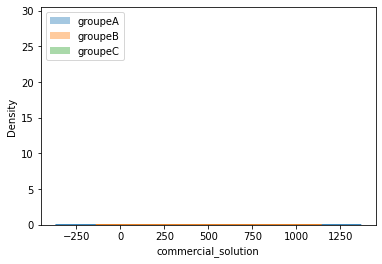

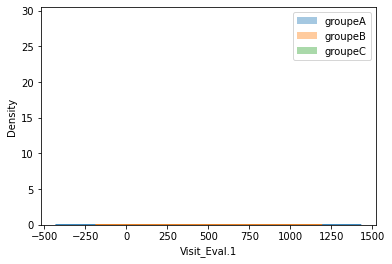

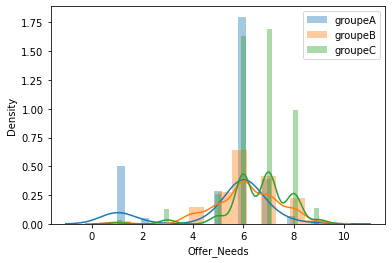

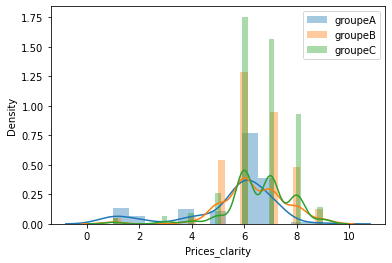

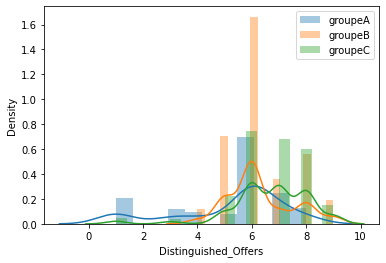

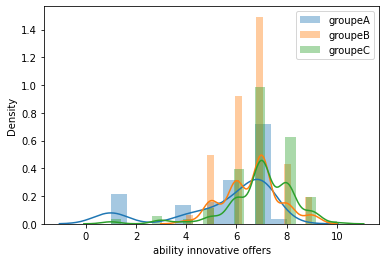

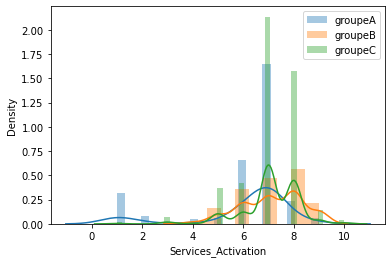

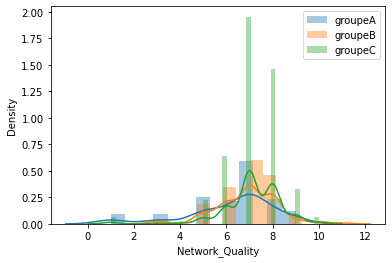

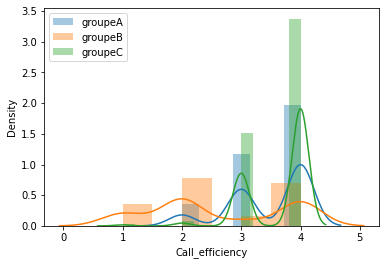

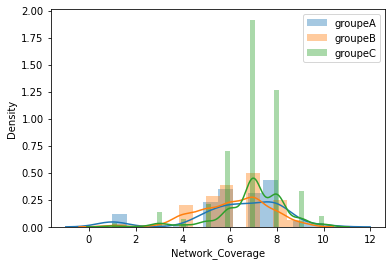

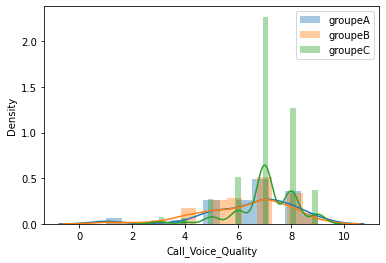

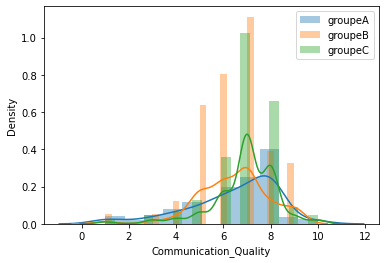

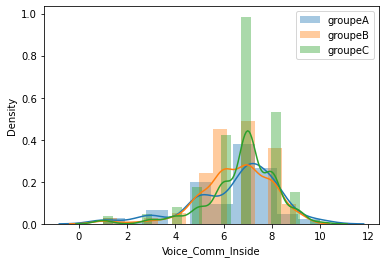

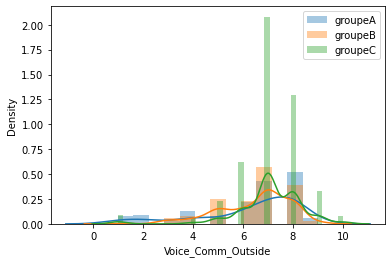

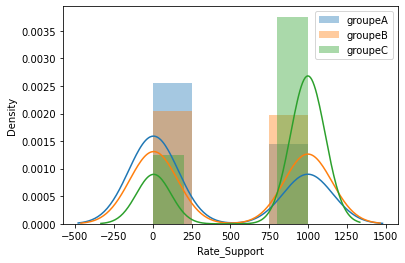

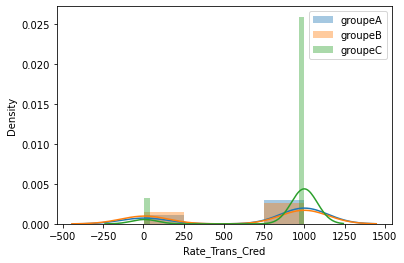

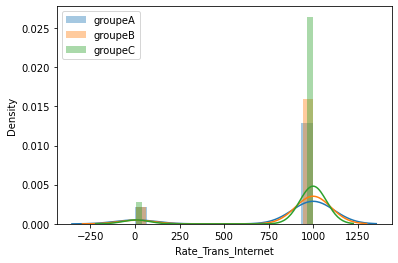

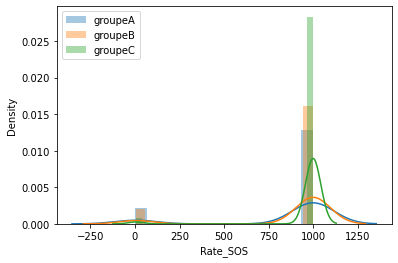

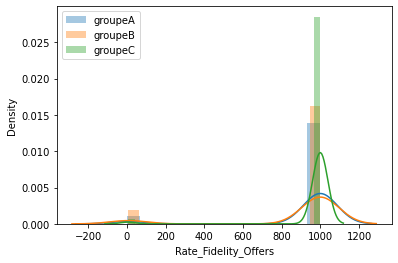

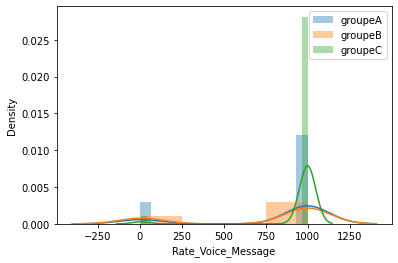

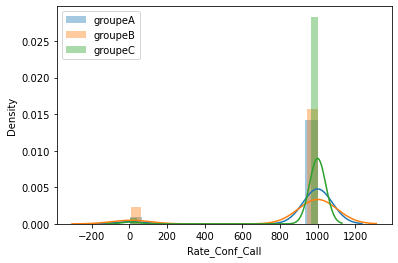

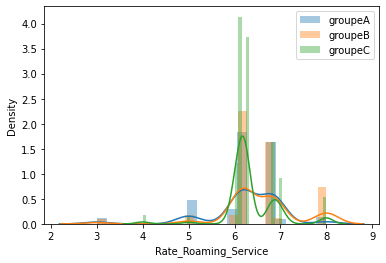

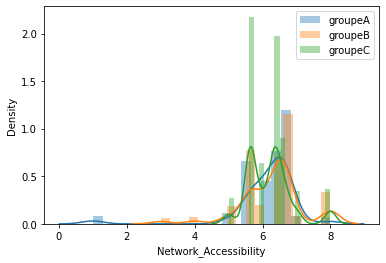

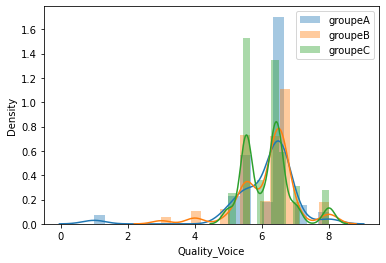

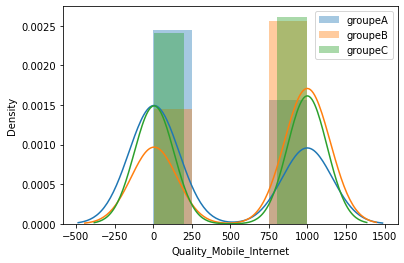

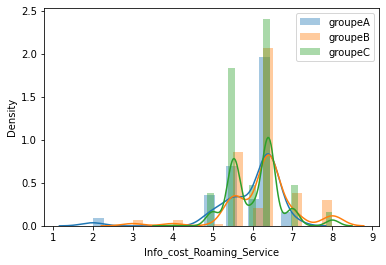

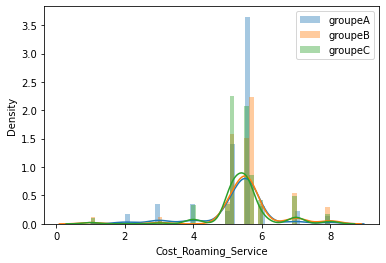

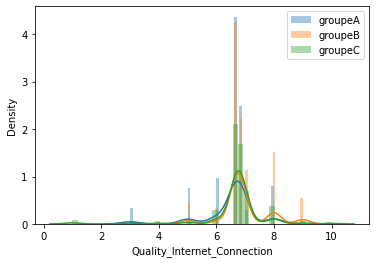

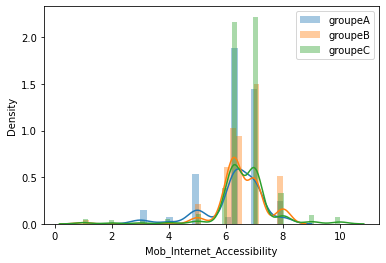

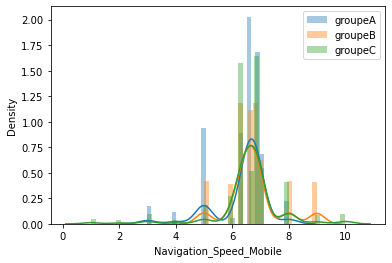

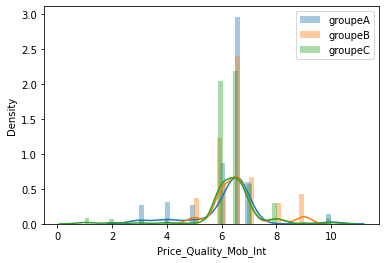

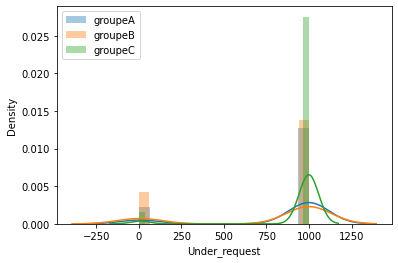

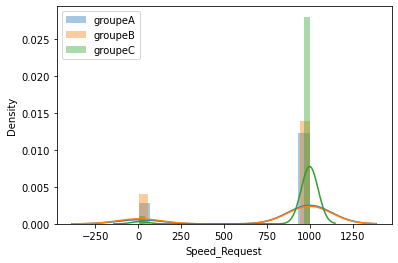

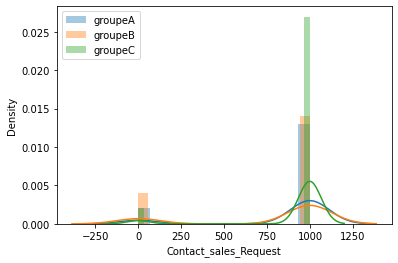

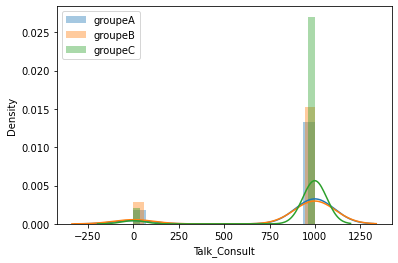

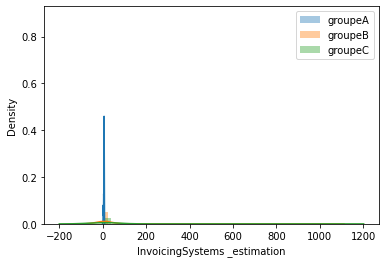

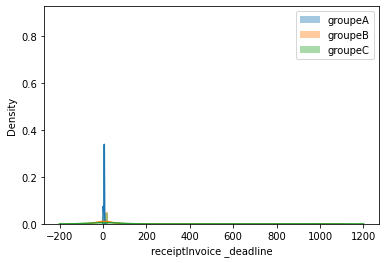

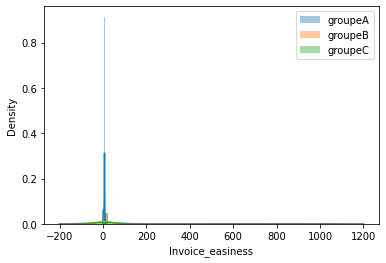

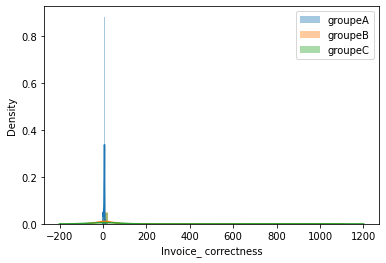

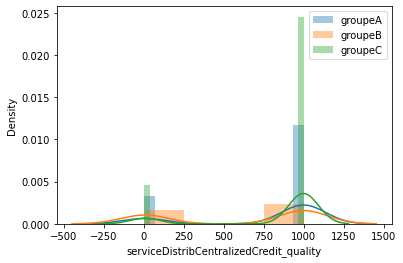

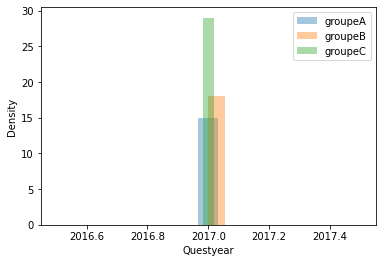

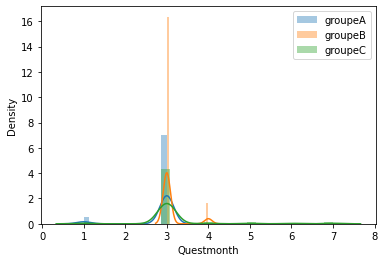

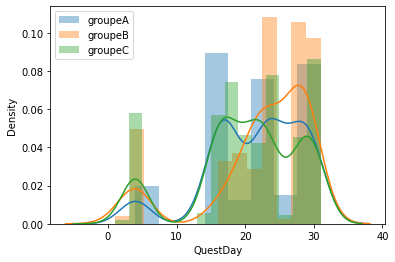

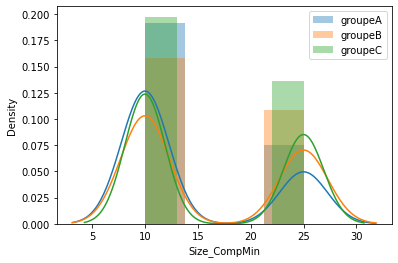

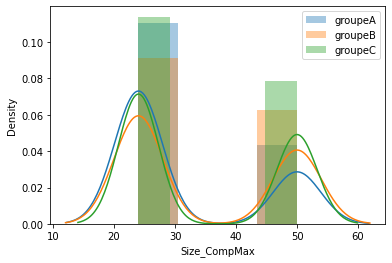

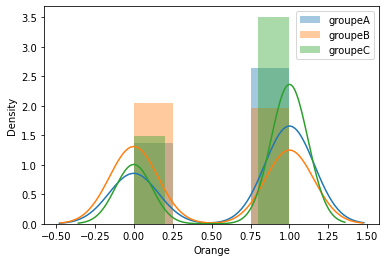

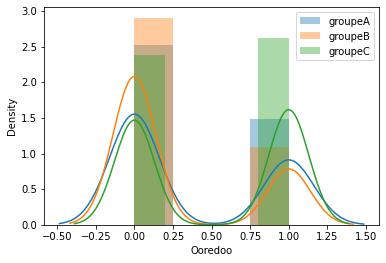

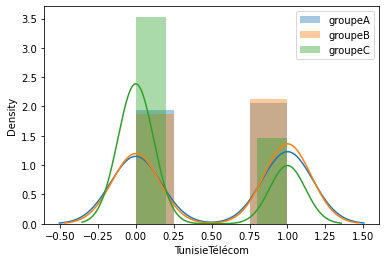

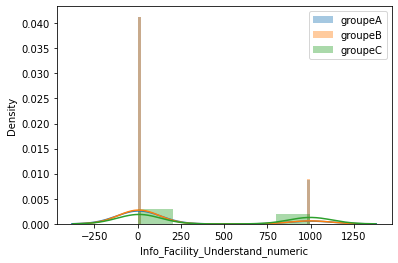

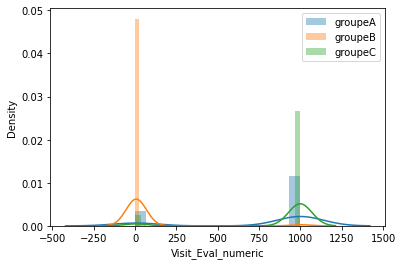

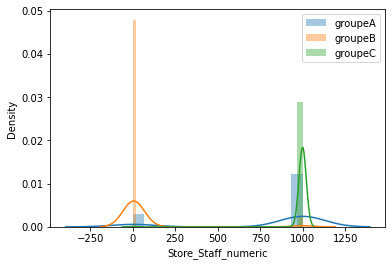

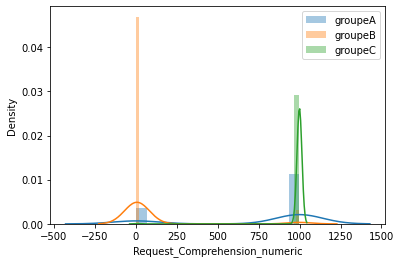

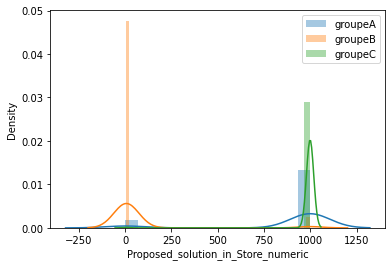

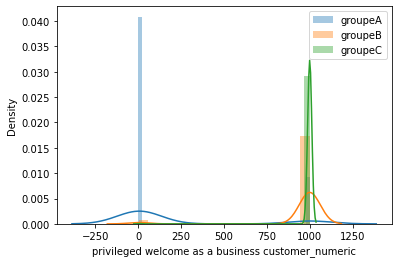

In [11]:
#Profiling
groupeA=df[kmeans.labels_==0]

groupeB=df[kmeans.labels_==1]

groupeC=df[kmeans.labels_==2]



data_predict = df
data_predict.insert(len(data_predict.columns), "Profiling_Kmeans", kmeans.labels_)
#df.insert(len(df.columns), "Profiling_Kmeans", kmeans.labels_)
#data_predict['Profiling'] = kmeans.labels_
#data_predict

for col in (data_predict.columns[data_predict.dtypes==object]): 
    plt.figure()
    sns.countplot(x=col,hue='Profiling_Kmeans',data=data_predict)
    plt.legend()
    
    
for col in (data_predict.columns[data_predict.dtypes!=object].drop('Profiling_Kmeans')): 
    plt.figure()
    sns.distplot(groupeA[col],label='groupeA')
    sns.distplot(groupeB[col],label='groupeB')
    sns.distplot(groupeC[col],label='groupeC')
  
    plt.legend()

# Classification Ascendante Hiérarchique

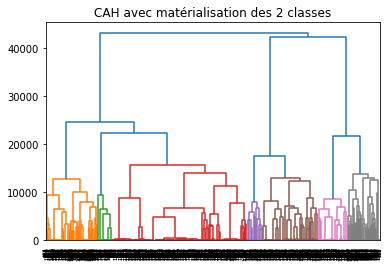

In [12]:
#visualisation : dendrogramme
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

#générer la matrice des distances 
Z = linkage(data,method='ward',metric='euclidean')

#affichage du dendrogramme 
# matérialisation des deux classes (hauteur t = 17500) 
plt.title('CAH avec matérialisation des 2 classes') 
dendrogram(Z,labels=data.index,orientation='top',color_threshold=17500) 
plt.show()

[1 1 1 ... 1 1 1]
Silhouette Score: 0.275
[0 0 0 ... 0 0 0]
Silhouette Score: 0.332
[0 0 0 ... 0 0 0]
Silhouette Score: 0.264
[1 1 1 ... 1 1 1]
Silhouette Score: 0.292
[1 1 1 ... 1 1 1]
Silhouette Score: 0.313
[0 0 0 ... 0 0 0]
Silhouette Score: 0.323
[7 0 0 ... 0 0 0]
Silhouette Score: 0.284
[7 2 2 ... 2 2 2]
Silhouette Score: 0.334
[7 2 2 ... 2 2 2]
Silhouette Score: 0.341
[7 2 2 ... 2 2 2]
Silhouette Score: 0.350
[7 2 2 ... 2 2 2]
Silhouette Score: 0.340
[7 2 2 ... 2 2 2]
Silhouette Score: 0.360
[7 2 2 ... 2 2 2]
Silhouette Score: 0.369
[7 0 0 ... 0 0 0]
Silhouette Score: 0.380
[ 3  7 15 ... 15 15 15]
Silhouette Score: 0.401
[ 3  7 15 ... 15 15 15]
Silhouette Score: 0.407
[ 3  7 15 ... 15 15 15]
Silhouette Score: 0.414
[ 3  7 15 ... 15 15 15]
Silhouette Score: 0.414
[ 1  3 15 ... 15 15 15]
Silhouette Score: 0.424
[ 1  3 15 ... 15 15 15]
Silhouette Score: 0.434
[ 0  3 15 ... 15 15 15]
Silhouette Score: 0.439
[22  3 15 ... 15 15 15]
Silhouette Score: 0.472
[22  3 15 ... 15 15 15]
Silh

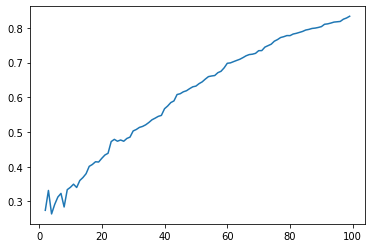

In [13]:
#modelisation
from sklearn.cluster import AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_samples, silhouette_score

y_pred_cah_tab = []
silhouette_cah_tab = []

for i in range(2,100):
    #modelisation
    cah = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    cah.fit(data)
    print(cah.labels_);
    y_pred_cah = cah.labels_
    y_pred_cah_tab.append(cah.labels_)
    #evaluation
    score = silhouette_score(data, cah.labels_, metric='euclidean')
    silhouette_cah = score
    print('Silhouette Score: %.3f' % score)
    silhouette_cah_tab.append(score)

plt.plot(range(2,100),silhouette_cah_tab)

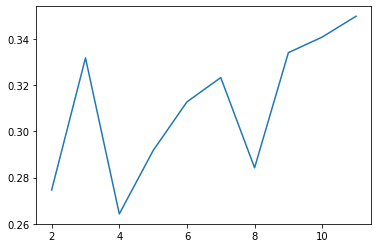

In [14]:
plt.plot(range(2,12),silhouette_cah_tab[:10])

In [15]:
#modelisation
cah = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cah.fit(data)
print(cah.labels_);
#evaluation
score = silhouette_score(data, cah.labels_, metric='euclidean')
silhouette_cah = score
print('Silhouette Score: %.3f' % score)

[0 0 0 ... 0 0 0]
Silhouette Score: 0.332


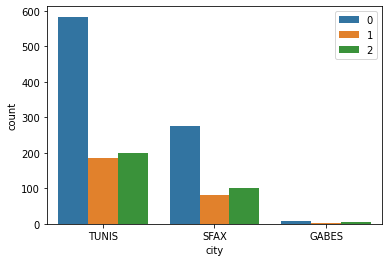

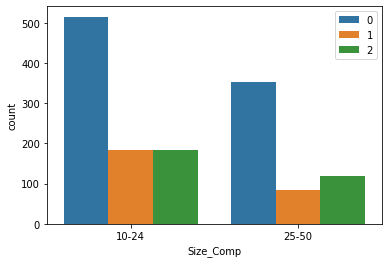

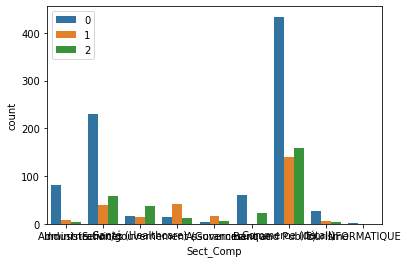

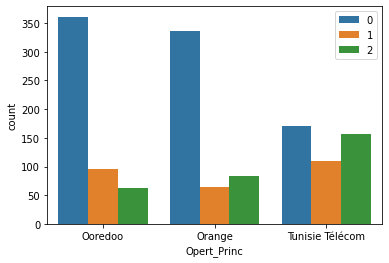

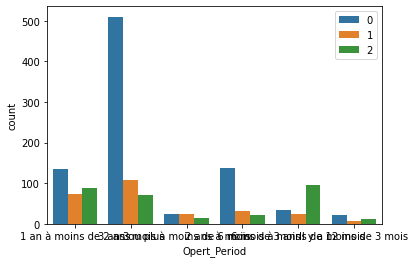

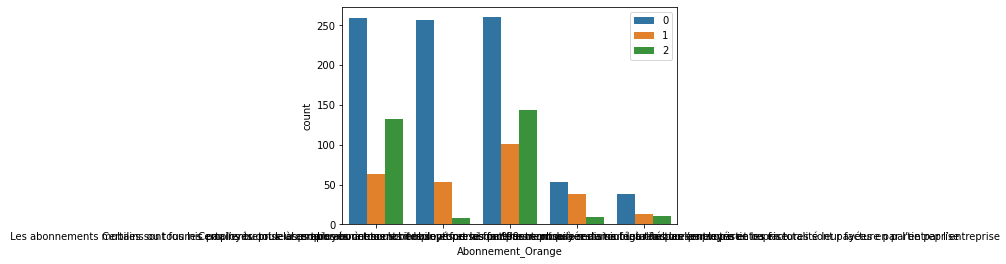

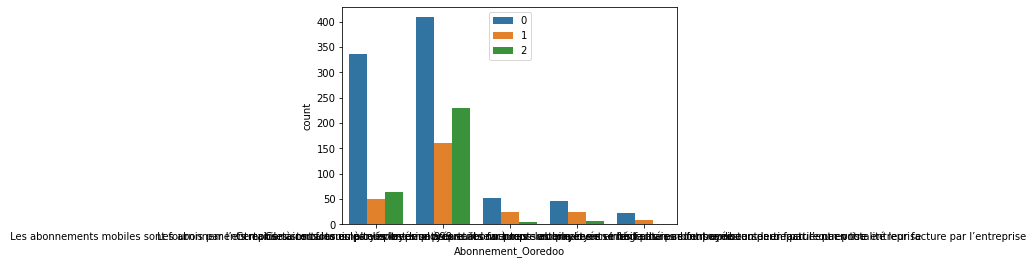

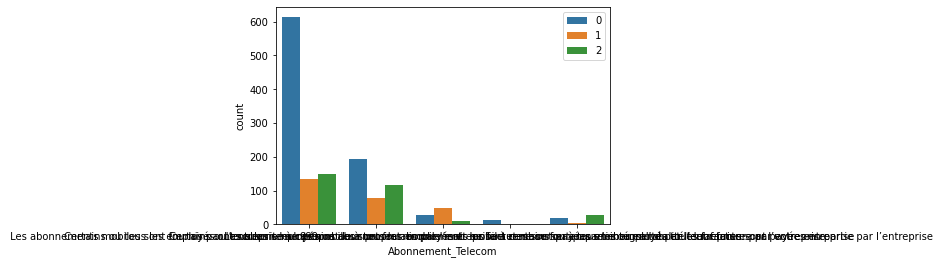

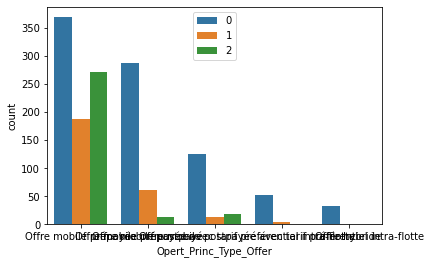

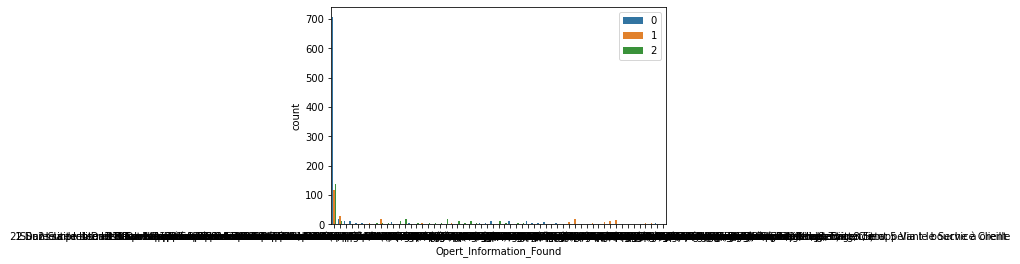

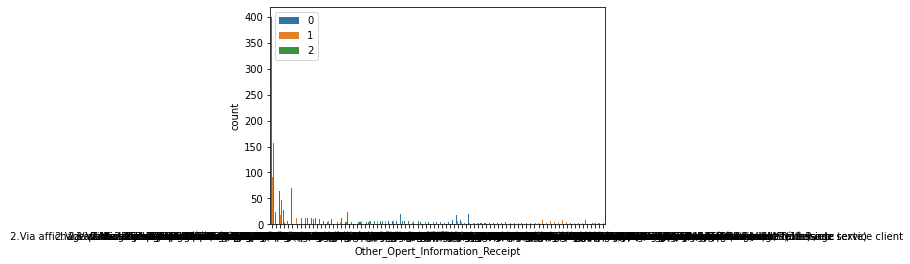

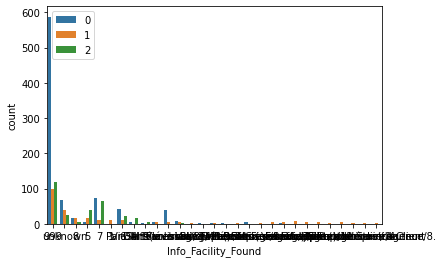

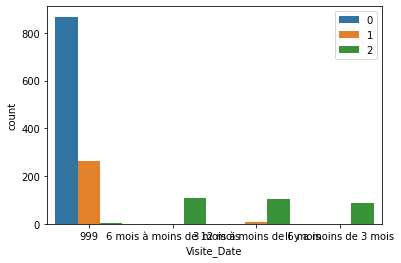

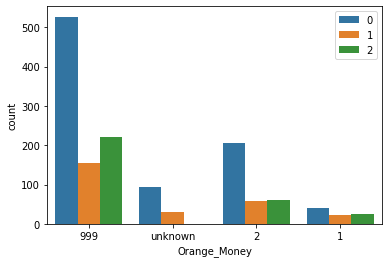

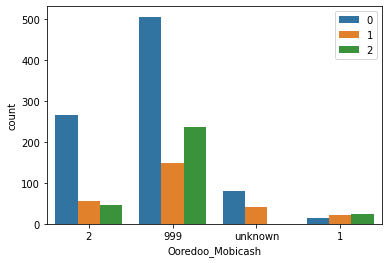

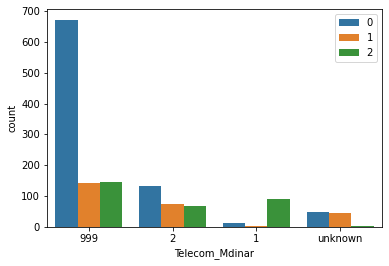

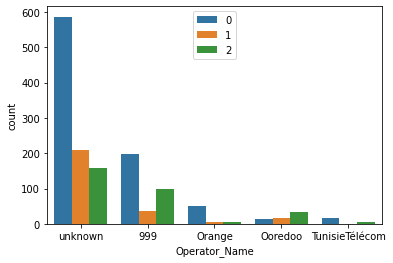

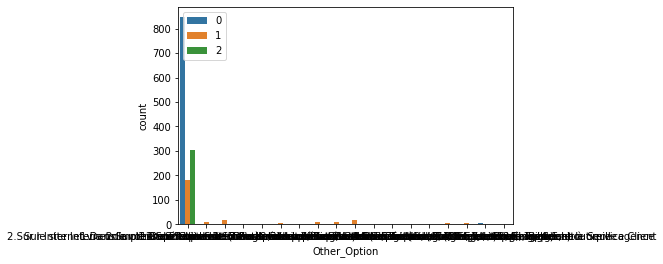

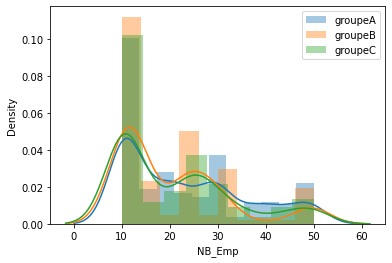

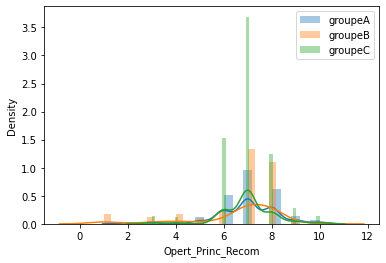

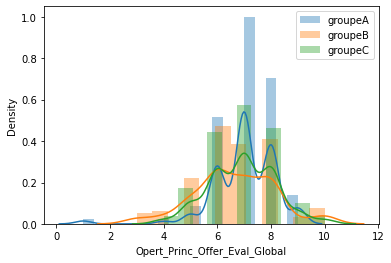

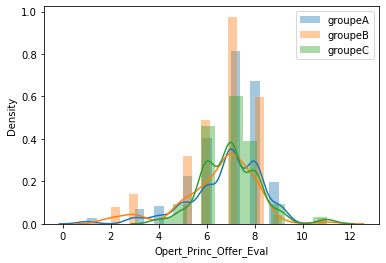

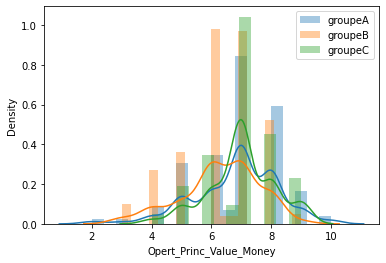

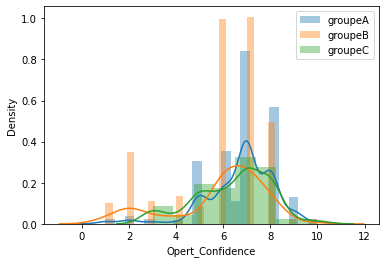

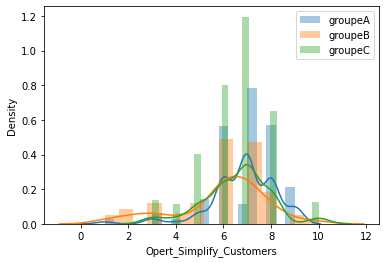

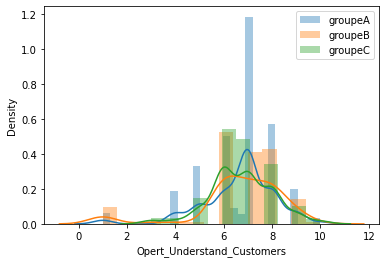

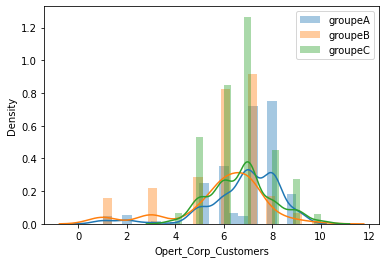

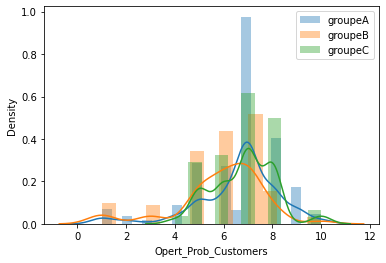

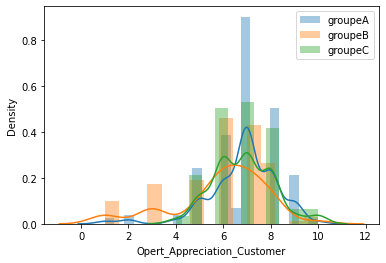

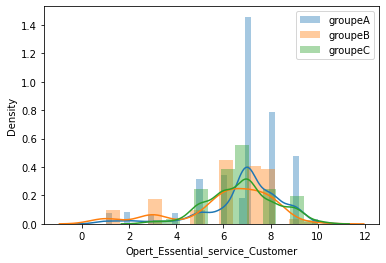

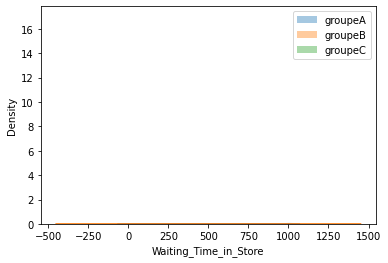

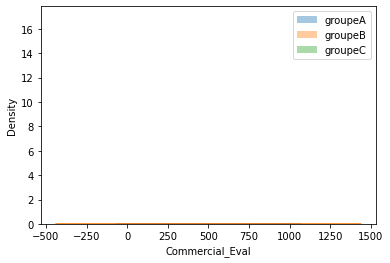

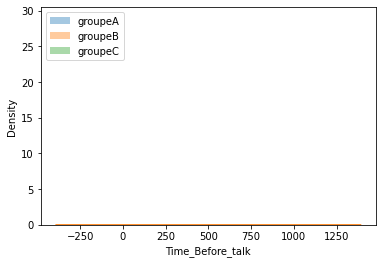

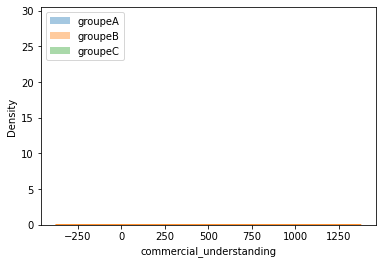

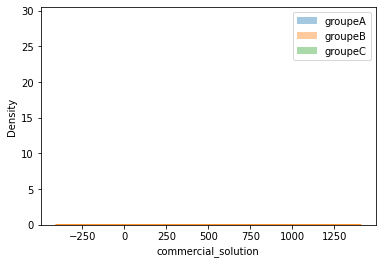

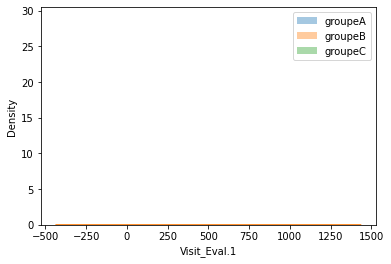

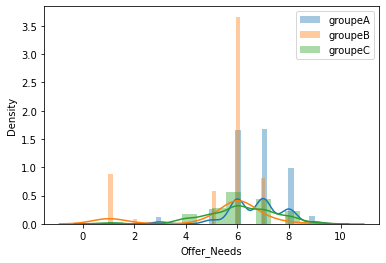

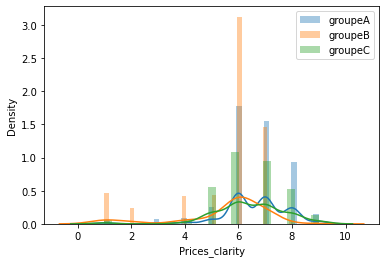

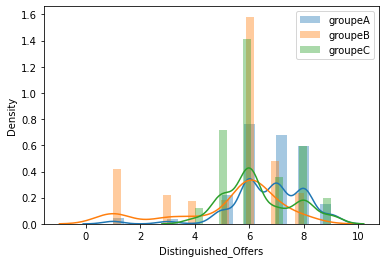

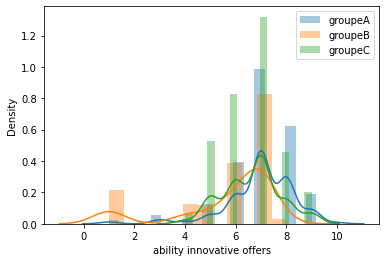

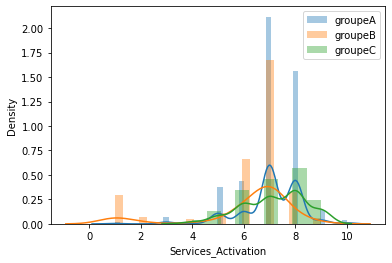

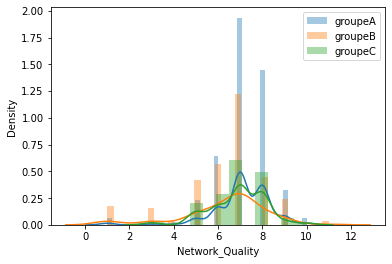

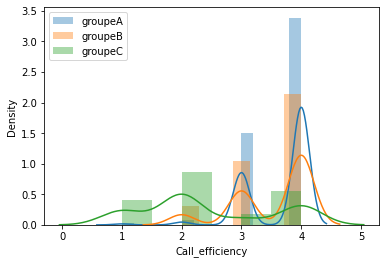

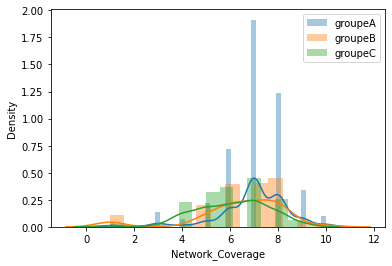

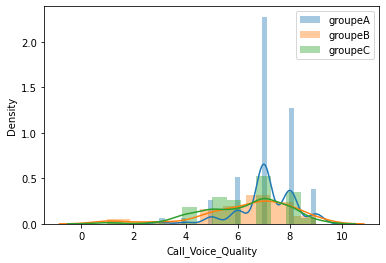

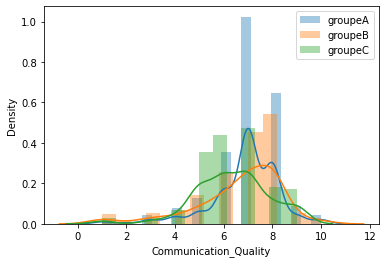

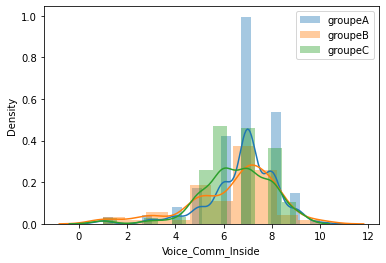

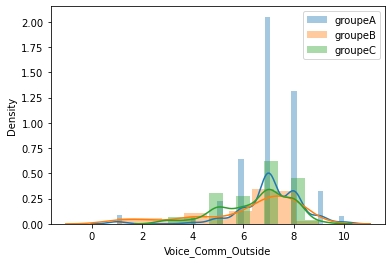

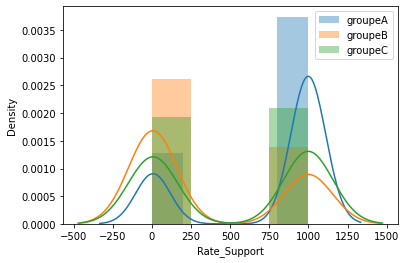

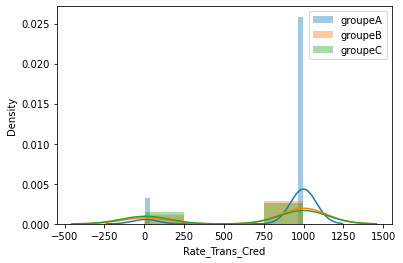

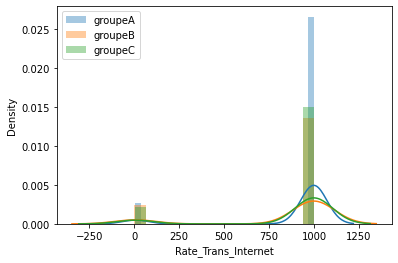

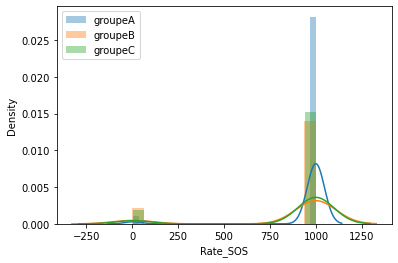

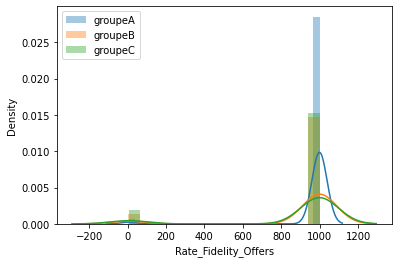

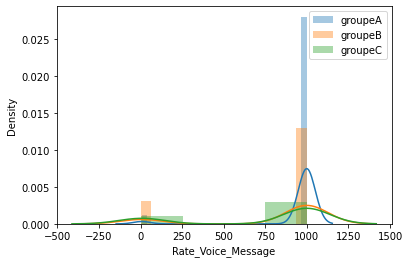

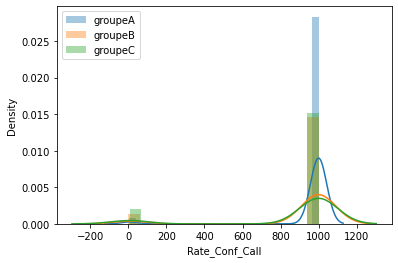

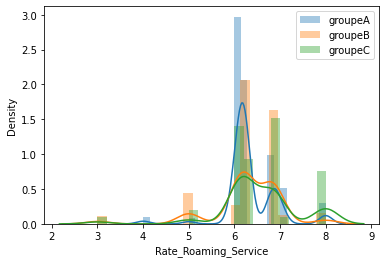

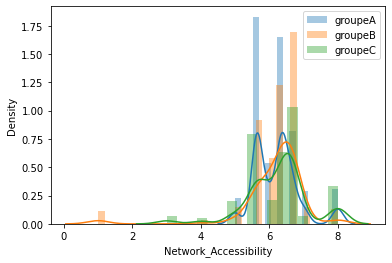

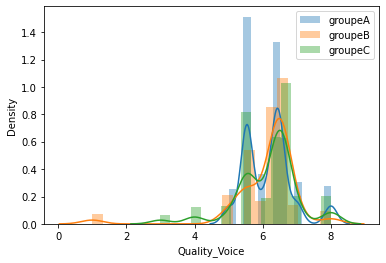

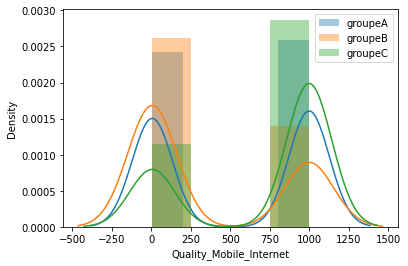

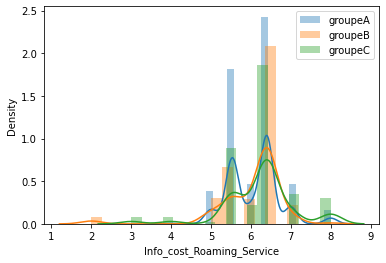

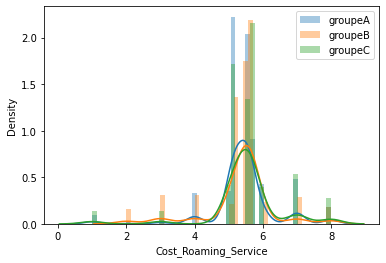

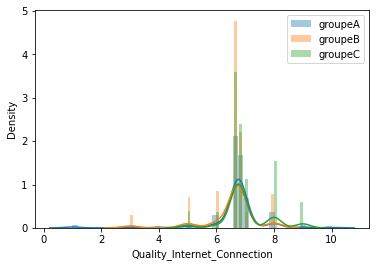

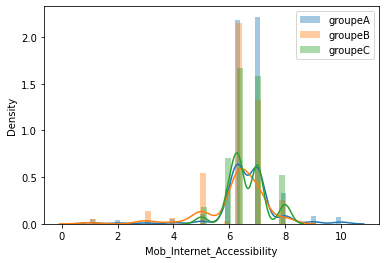

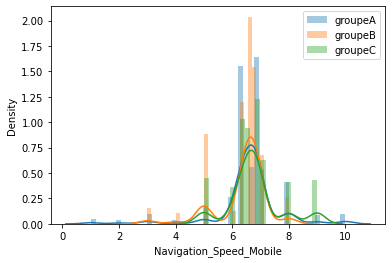

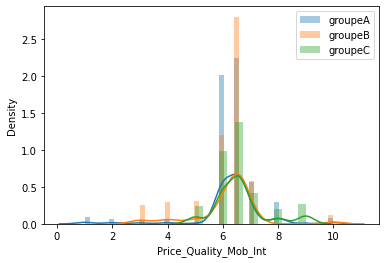

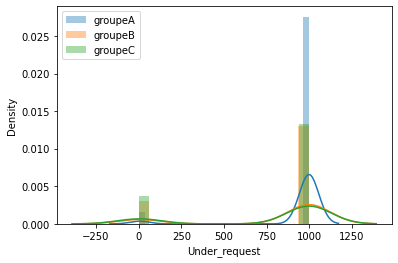

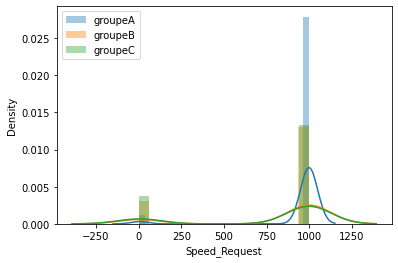

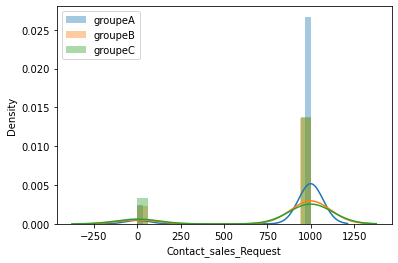

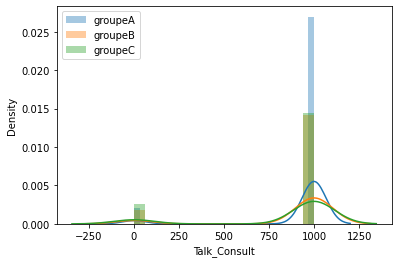

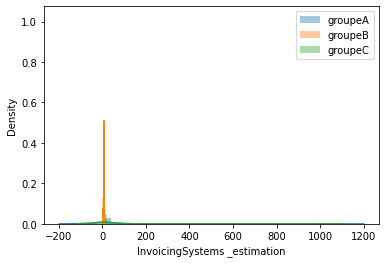

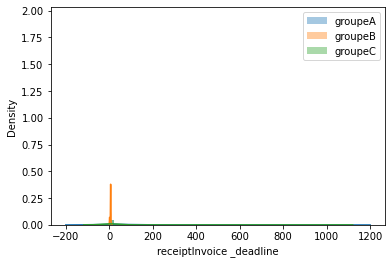

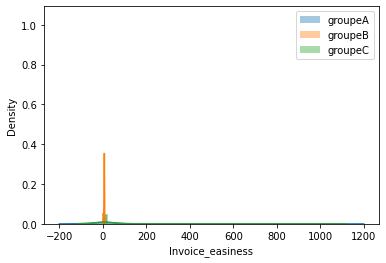

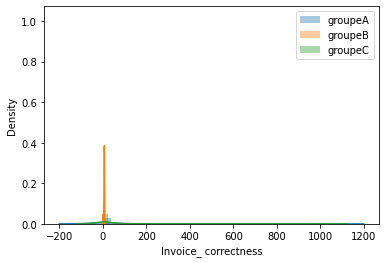

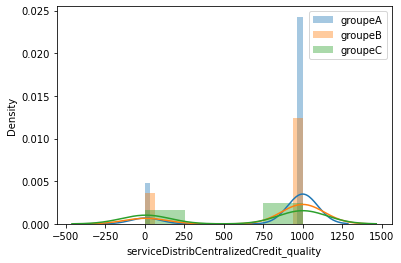

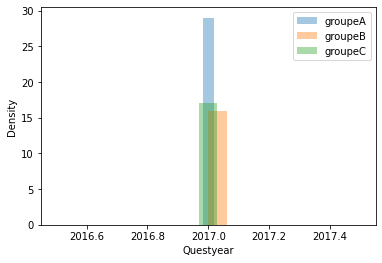

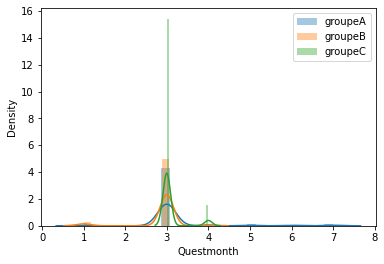

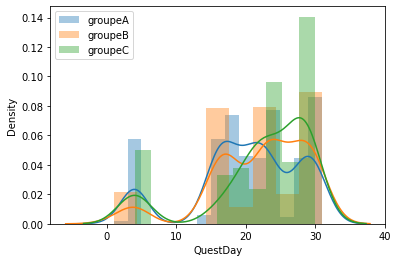

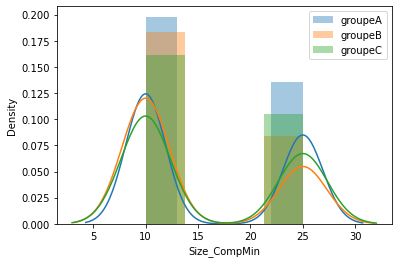

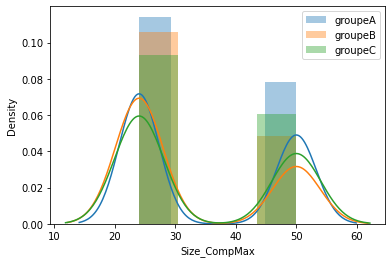

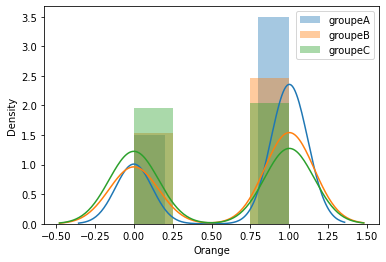

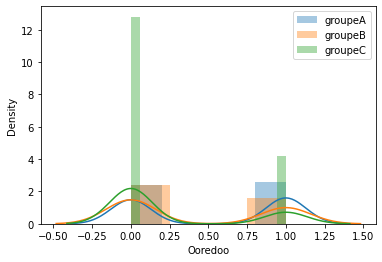

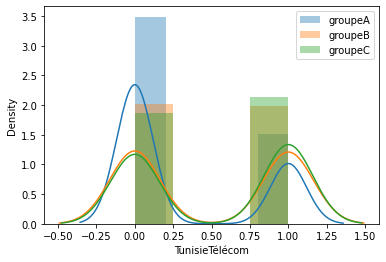

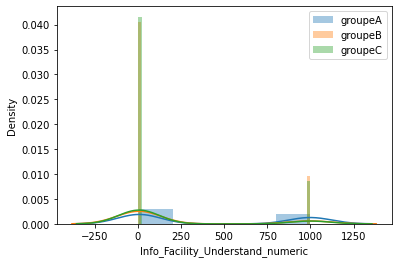

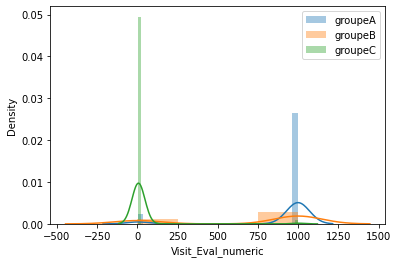

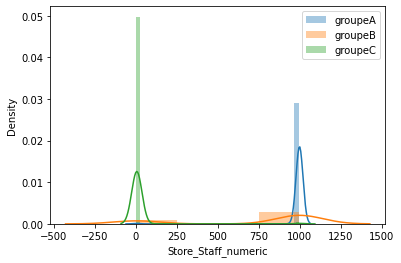

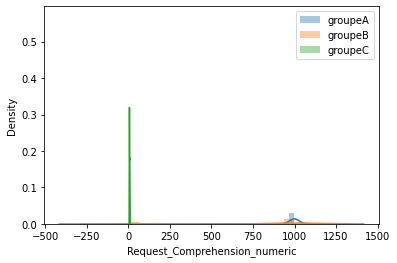

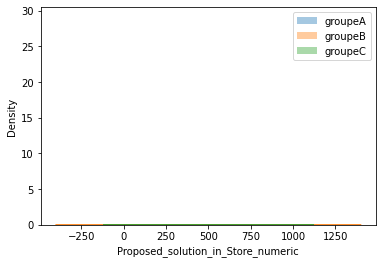

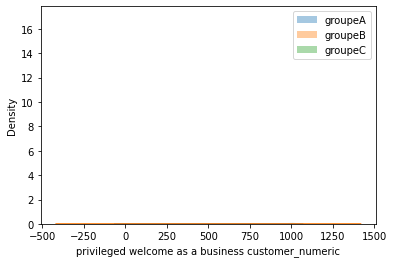

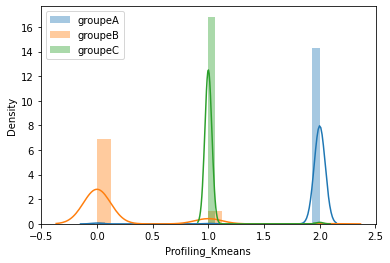

In [16]:
#Profiling
groupeA=df[cah.labels_==0]

groupeB=df[cah.labels_==1]

groupeC=df[cah.labels_==2]



data_predict_cah = df
data_predict_cah.insert(len(data_predict_cah.columns), "Profiling_cah", cah.labels_)
#df.insert(len(df.columns), "Profiling_cah", cah.labels_)
#data_predict['Profiling'] = kmeans.labels_

for col in (data_predict_cah.columns[data_predict_cah.dtypes==object]):
    plt.figure()
    sns.countplot(x=col,hue='Profiling_cah',data=data_predict_cah)
    plt.legend()
    
    
for col in (data_predict_cah.columns[data_predict_cah.dtypes!=object].drop('Profiling_cah')): 
    plt.figure()
    sns.distplot(groupeA[col],label='groupeA')
    sns.distplot(groupeB[col],label='groupeB')
    sns.distplot(groupeC[col],label='groupeC')

    plt.legend()

In [17]:
#2.Comparaison des algorithmes non supervisés
silhouette = pd.Series([silhouette_km,silhouette_cah],  
        index=['K-Means', 'cah'])
accuracy = pd.DataFrame({'Silhouette': silhouette})
accuracy

,Silhouette
K-Means,0.338733
cah,0.331773


In [25]:
groupeA['satisfaction']='moins satisfait'
groupeB['satisfaction']='moyennement satisfait'
groupeC['satisfaction']='satisfait'

In [40]:
frames = [groupeA, groupeB, groupeC]
result = pd.concat(frames)

In [43]:
result['satisfaction'].value_counts(dropna=False)
result.to_excel('CLustring.xlsx',index=False)